In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#load data
df = pd.read_csv(r"C:\Users\shijin kunju\Desktop\ironhack\week7\project_3\video_game_sales\data\raw\video_game_sales_final_cleaned.csv")
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,rating,rating_grouped,name_clean
0,wii sports,WII,2006,sports,Nintendo,41.36,28.96,3.77,8.45,82.53,E,Children,wii sports
1,super mario bros.,NES,1985,platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Unrated,Unrated,super mario bros
2,mario kart wii,WII,2008,racing,Nintendo,15.68,12.76,3.79,3.29,35.52,E,Children,mario kart wii
3,wii sports resort,WII,2009,sports,Nintendo,15.61,10.93,3.28,2.95,32.77,E,Children,wii sports resort
4,pokemon red/pokemon blue,GB,1996,role-playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Unrated,Unrated,pokemon redpokemon blue


In [2]:
# Create binary target
median_sales = df['global_sales'].median()
median_sales


0.0

In [3]:
df['high_sales'] = (df['global_sales'] > median_sales).astype(int)


In [4]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['platform', 'genre', 'publisher', 'rating'])

# Select features (exclude non-numeric/target columns)
X = df_encoded.drop(columns=['name', 'name_clean', 'global_sales', 'high_sales', 'rating_grouped'])
y = df_encoded['high_sales']

In [5]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9984001347254968
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7685
           1       1.00      1.00      1.00      4191

    accuracy                           1.00     11876
   macro avg       1.00      1.00      1.00     11876
weighted avg       1.00      1.00      1.00     11876



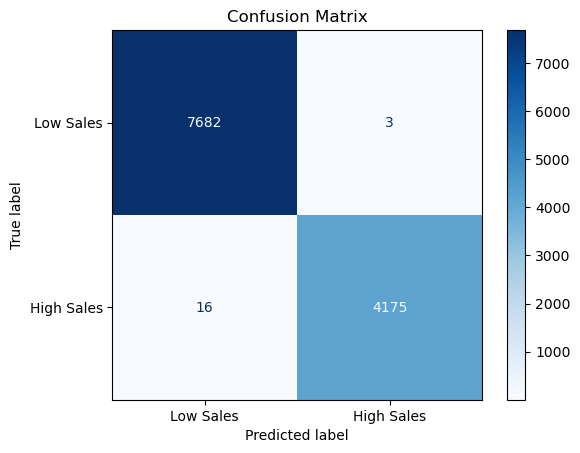

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Sales", "High Sales"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()